### 필요한 라이브러리 불러오기

In [71]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

### url 변수에 크롤링할 홈페이지 주소 가져오기 

In [72]:
url = "http://www.lotteria.com/menu/Menu_All.asp"

### 해당 url의 html을 불러오기 + HTML 분석하고 파싱

In [73]:
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

### 원하는 정보 크롤링하기 - menu_list, kcal_list, price_list 라는 3가지 리스트에 각각 모든 메뉴, 칼로리, 가격 정보 모두 넣기(단 kcal, 원 단위는 생략)

In [74]:
menu_list = [x.text for x in soup.select('div.bx_flex.menuRoundWrap > div > a')]
kcal_list = [x.text.replace('Kcal', '') for x in soup.select('div.bx_flex.menuRoundWrap > div > span')]
price_list = [x.text.replace('원', '') for x in soup.select('div.bx_flex.menuRoundWrap > div > strong')]

#select_one, select, find, find_all 4가지 연산자 중 선택하여 사용하면 됩니다.

### 가져온 정보(3개의 리스트)를 딕셔너리 형태로 만들기(칼럼명, 순서는 'menu', 'kcal', 'price') + 데이터프레임으로 만들어 5줄만 나타내기 (칼럼 순서 지켜야 함!)

In [75]:
data = [{'menu': menu_list[i], 'kcal': kcal_list[i], 'price': price_list[i]} for i in range(len(menu_list))]
burger_df = pd.DataFrame(data)
burger_df.head()

,menu,kcal,price
0,핫클라쓰 세트,"1,231","7,200"
1,마일드클라쓰 세트,"1,095","6,300"
2,리아미라클버거 세트,968,"7,400"
3,와규 에디션Ⅱ 세트,892,"7,600"
4,더블X2 세트,"1,125","7,500"


### test 폴더에 csv파일로 저장 (파일이름은 '롯데리아메뉴', 엑셀 파일을 열었을 때 한글이 깨지지 않고, 인덱스 없이 저장하기)

In [76]:
burger_df.to_csv('../data/롯데리아메뉴.csv', encoding='euc-kr')

### df 변수에 저장했던 csv파일 불러오기, 옵션에 thousands=',' 추가하여 천 단위 표현(,)생략 + 5줄 나타내기

In [77]:
df = pd.read_csv('../data/롯데리아메뉴.csv', thousands=',', encoding='euc-kr')
df.drop(['Unnamed: 0'], inplace=True, axis=1)
df.head()

,menu,kcal,price
0,핫클라쓰 세트,1231,7200
1,마일드클라쓰 세트,1095,6300
2,리아미라클버거 세트,968,7400
3,와규 에디션Ⅱ 세트,892,7600
4,더블X2 세트,1125,7500


### df의 총 데이터 건수, 데이터 타입, Null 건수를 한 번에 알아보기

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   menu    81 non-null     object
 1   kcal    81 non-null     int64 
 2   price   81 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.0+ KB


### df의 'menu' 칼럼명을 '메뉴'로 수정하기

In [79]:
df.rename(columns={'menu': '메뉴'}, inplace=True)
df.head()

,메뉴,kcal,price
0,핫클라쓰 세트,1231,7200
1,마일드클라쓰 세트,1095,6300
2,리아미라클버거 세트,968,7400
3,와규 에디션Ⅱ 세트,892,7600
4,더블X2 세트,1125,7500


### df의 인덱스를 확인하기

In [80]:
df.index

RangeIndex(start=0, stop=81, step=1)

### (loc, iloc 명령 중 선택하여 사용) df의 인덱스를 확인하여 맨 마지막 그 다음 행(81번째 행)에 '메뉴'는 '오미자에이드', 'kcal'는 140, 'price'는 3000 정보를 가진 행 추가하기 + 맨 마지막 행 확인하기

In [81]:
df.loc[len(df)] = ['오미자에이드', 140, 3000]
df.iloc[-1]

메뉴       오미자에이드
kcal        140
price      3000
Name: 81, dtype: object

### df를 복사하여 df2라는 새로운 데이터프레임 만들기

In [82]:
df2= df.copy()

### df2 에 '만족도'라는 새로운 칼럼을 만들어  '만족도' 값이 모두 NaN값을 가지도록 하기 + 5줄 나타내기

In [83]:
df2['만족도'] = np.nan
df2.head()

,메뉴,kcal,price,만족도
0,핫클라쓰 세트,1231,7200,NaN
1,마일드클라쓰 세트,1095,6300,NaN
2,리아미라클버거 세트,968,7400,NaN
3,와규 에디션Ⅱ 세트,892,7600,NaN
4,더블X2 세트,1125,7500,NaN


### g_index라는 변수에 kcal가 500미만이고, price가 5000 이하인 인덱스를 저장하기 + 인덱스가 g_index인 '만족도' 값을 모두 5로 만들기 (loc, iloc 명령 중 선택하여 사용)

In [84]:
g_index = [i if df2['kcal'][i] < 500 and df2['price'][i] <= 5000 else None for i in range(len(df2))]
df2['만족도'] = [5 if g_index[i] is not None else np.nan for i in range(len(g_index)) ]

### s_index라는 변수에 kcal가 500이상, 1000미만인 인덱스를 저장하기 + 인덱스가 s_index인 '만족도' 값을 모두 3로 만들기 (loc, iloc 명령 중 선택하여 사용)

In [85]:
s_index = [i if 500 <= df2['kcal'][i] < 1000 else None for i in range(len(df2))]
df2['만족도'] = [3 if s_index[i] is not None else df2['만족도'][i] for i in range(len(s_index)) ]

### b_index라는 변수에 kcal가 1000이상인 인덱스를 저장하기 + 인덱스가 b_index인 '만족도' 값을 모두 1로 만들기 (loc, iloc 명령 중 선택하여 사용)

In [86]:
b_index = [i if df2['kcal'][i] >= 1000 else None for i in range(len(df2))]
df2['만족도'] = [1 if b_index[i] is not None else df2['만족도'][i] for i in range(len(b_index)) ]

### df2의 각각의 칼럼에 총 몇 개의 NaN을 가지고 있는지 한 번에 나타내기

In [87]:
df2.isna().sum()

메뉴       0
kcal     0
price    0
만족도      1
dtype: int64

### df2의 '만족도' 칼럼이 NaN인 행의 데이터 찾기

In [88]:
df2[df2['만족도'].isnull()]

,메뉴,kcal,price,만족도
28,와규 에디션Ⅱ,497,5800,NaN


### df2가 갖고 있는 결손 데이터 삭제하기 + 삭제가 잘 되었는지 확인하기  

In [89]:
df2.dropna(inplace=True)
df2.isna().sum()

메뉴       0
kcal     0
price    0
만족도      0
dtype: int64

### df를 'price'가 높은 순서대로 정렬하여 'high_price'라는 새로운 데이터프레임으로 저장하기 + high_price 데이터 프레임의 인덱스를 '메뉴'로 바꾸기 + high_price 상위 7줄 나타내기

In [90]:
high_price = df.sort_values('price', ascending=False)
high_price.head()

,메뉴,kcal,price
21,치킨풀팩,2590,18800
23,순살치킨 풀팩,1477,15900
13,한우명품팩,1830,15600
10,한우연인팩,1714,13900
20,패밀리팩,1712,13600


### matplotlib을 사용하여 시각화하기

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

#윈도우
#path = "c:/Windows/Fonts/malgun.ttf"
#font_name = font_manager.FontProperties(fname=path).get_name()
#rc('font', family=font_name)

#맥
rc('font', family='AppleGothic')

### 시각화 조건
figure 크기는 (10,10)

plt.scatter을 사용하여 데이터를 점으로 나타내기, x축 값은 df['kcal'], y축 값은 df['price'], 점의 사이즈는 50, 마커 모양은 별모양, 색깔은 초록색

제목은 '롯데리아 메뉴'

x축 제목은 '칼로리'

y축 제목은 '가격'

y축 범위는 0~20000

high_price 데이터 프레임을 사용하여 가격이 높은 상위 7개 메뉴 글자로 나타내기

시각화 한 차트를 현재경로(test폴더)에 png 형식으로 저장하기 (파일명: '롯데리아메뉴_학년반번호이름')
ex) 롯데리아메뉴_3221임은영

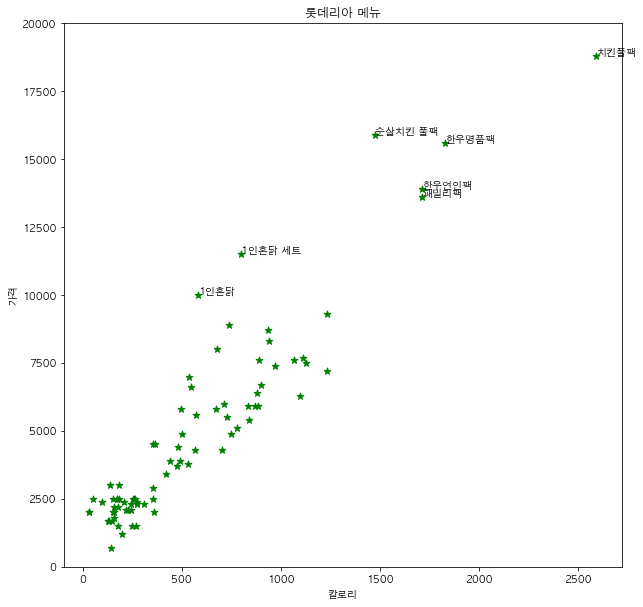

In [93]:
plt.figure(figsize=[10, 10])
plt.scatter(df['kcal'], df['price'], color = 'g', marker='*', s=50)

for n in range(7):
    plt.text(high_price['kcal'][high_price.index[n]], high_price['price'][high_price.index[n]], high_price['메뉴'][high_price.index[n]], fontsize=10)
plt.title('롯데리아 메뉴')
plt.xlabel('칼로리')
plt.ylabel('가격')
plt.ylim(0, 20000)

plt.savefig('롯데리아메뉴_3220최호승.png')
plt.show()